In [1]:
import cv2 
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Load images from directory

In [2]:
directory = 'data/all_images'

images = []

for filename in os.listdir(directory):
    if filename.endswith('.jpg'):
        full_path = os.path.join(directory, filename)
        img = mpimg.imread(full_path)
        images.append(img)

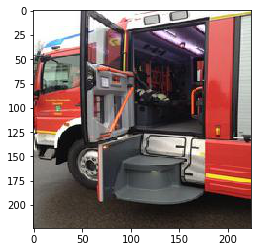

In [3]:
imgplot = plt.imshow(images[0])

# Load Data

In [4]:
train_data = pd.read_csv("data/train.csv")
test_data = pd.read_csv("data/test.csv")

In [5]:
train_data.head()

,image_names,emergency_or_not
0,1503.jpg,0
1,1420.jpg,0
2,1764.jpg,0
3,1356.jpg,0
4,1117.jpg,0


In [6]:
test_data.head()

,image_names
0,1960.jpg
1,668.jpg
2,2082.jpg
3,808.jpg
4,1907.jpg


# Load train images

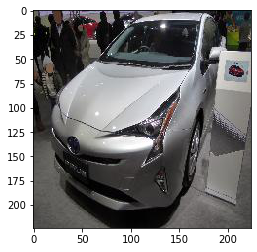

In [7]:
train_images = []

for filename in train_data['image_names']:
    image = mpimg.imread(directory + '/' + filename)
    train_images.append(image)
    
plt.imshow(train_images[0]);

# Load test images

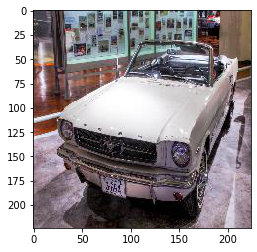

In [8]:
test_images = []

for filename in test_data['image_names']:
    image = mpimg.imread(directory + '/' + filename)
    test_images.append(image)
plt.imshow(test_images[0]);

# Load train and dev data

In [9]:
# We are considering train_data as our data and we split it into 'train' and 'validation' dataset
X = train_images
y = train_data['emergency_or_not']

In [10]:
from sklearn.model_selection import train_test_split
X_train, X_dev, y_train, y_dev = train_test_split(X, y, test_size=0.33, random_state=42)

X_train = np.array(X_train)
X_dev = np.array(X_dev)
y_train = np.array(y_train)
y_dev = np.array(y_dev)

In [11]:
#Normalize data
X_train = np.array(X_train)/255
y_train = np.array(y_train)/255

# Neural Network 

In [12]:
image_shape = X_train[0].shape #All images are of same size. So we are taking first image and checking shape
print(image_shape)

input_image_size = image_shape[0]

(224, 224, 3)


In [13]:
from keras.models import Sequential
from keras.layers import Dense, MaxPool2D, Activation, Flatten

Using TensorFlow backend.


In [14]:
model = Sequential()

model.add(Flatten(input_shape = image_shape)) # Input layer
model.add(Dense(16, activation='relu')) # Hidden layer
model.add(Dense(8, activation='relu')) # Hidden layer
model.add(Dense(1, activation='softmax')) # Output layer

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 150528)            0         
_________________________________________________________________
dense_1 (Dense)              (None, 16)                2408464   
_________________________________________________________________
dense_2 (Dense)              (None, 8)                 136       
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 9         
Total params: 2,408,609
Trainable params: 2,408,609
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.compile(loss = 'binary_crossentropy', optimizer = 'rmsprop', metrics = ['accuracy'])

model.fit(X_train, y_train, epochs=100, batch_size=100)

Epoch 1/100
1102/1102 [==============================] - 4s 3ms/step - loss: 15.3090 - accuracy: 0.0000e+00
Epoch 2/100
1102/1102 [==============================] - 2s 2ms/step - loss: 15.3090 - accuracy: 0.0000e+00A: 1s - loss: 15.3071 - accuracy: 0.
Epoch 3/100
1102/1102 [==============================] - 2s 2ms/step - loss: 15.3090 - accuracy: 0.0000e+00
Epoch 4/100
1102/1102 [==============================] - 2s 2ms/step - loss: 15.3090 - accuracy: 0.0000e+00
Epoch 5/100
1102/1102 [==============================] - 1s 1ms/step - loss: 15.3090 - accuracy: 0.0000e+00
Epoch 6/100
1102/1102 [==============================] - 2s 2ms/step - loss: 15.3090 - accuracy: 0.0000e+00
Epoch 7/100
1102/1102 [==============================] - 2s 1ms/step - loss: 15.3090 - accuracy: 0.0000e+00
Epoch 8/100
1102/1102 [==============================] - 1s 1ms/step - loss: 15.3090 - accuracy: 0.0000e+00
Epoch 9/100
1102/1102 [==============================] - 2s 1ms/step - loss: 15.3090 - accuracy: 0.0

In [ ]:
predict_img = X_dev[12]
plt.imshow(predict_img)

In [ ]:
yp = model.predict(X_dev)
np.argmax(yp[predict_img])

In [ ]:
model.evaluate(X_dev, y_dev)

Our accuracy score is 0.43 with simple layers. We need to improve

# Now we try with adding more images using 'Augumentation'

In [ ]:
from keras.preprocessing.image import ImageDataGenerator

In [ ]:
datagen = ImageDataGenerator(
        rotation_range=40,
        width_shift_range=0.2,
        height_shift_range=0.2,
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True,
        fill_mode='nearest')